In [2]:
import pickle
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
filename = 'C:/Users/sablo/original/CarAccidentPrediction/MyProject/FlaskAPI/accident-prediction-rfc-model.pkl'
classifier = pickle.load(open(filename, 'rb'))

In [3]:
modeldata = pd.read_csv("model_Data.csv")
modeldata['Traffic_Signal'] = modeldata["Traffic_Signal"].apply(lambda x: True if x else False)
modeldata['Station'] = modeldata["Station"].apply(lambda x: True if x else False)
modeldata['Junction'] = modeldata["Junction"].apply(lambda x: True if x else False)
modeldata['Crossing'] = modeldata["Crossing"].apply(lambda x: True if x else False)
modeldata['Sunrise_Sunset'] = modeldata["Sunrise_Sunset"].apply(lambda x: True if x == 'Day' else False)
weather_categories = pd.get_dummies(modeldata['weather_keyword'],drop_first=True)
modeldata.drop(['weather_keyword'],axis=1,inplace=True)
modeldata = pd.concat([modeldata,weather_categories],axis=1)

In [ ]:
y = modeldata['Accident']
#X = modeldata.drop(labels=['Wind_Direction'], axis = 1, inplace=True)
#y = modeldata['Accident']
modeldata.drop(labels=['Wind_Direction','Accident'], axis = 1, inplace=True)
X = modeldata


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [8]:
prob = classifier.predict_proba(X_test)


In [12]:
pred = classifier.predict(X_test)

In [13]:
pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [17]:
X_test['prob'] = pd.DataFrame(prob)[1]

C:\Users\sablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
sortedTestData = X_test.sort_values('prob', ascending=False)

In [22]:
hotspots = sortedTestData[sortedTestData['prob'] > 0.8]

In [27]:
#Top Accident Clusters with high accident probability!
hotspots.groupby('Cluster').count().sort_values('Weekday',ascending = False).head(10)

,Start_Lat,Start_Lng,Weekday,Hour,Date,Month,Sunrise_Sunset,Traffic_Signal,Station,Junction,...,Visibility(mi),Humidity(%),cloudy,fog,overcast,rain,snow,thunderstorm,wind,prob
Cluster,,,,,,,,,,,,,,,,,,,,,
182,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
5,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
228,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
18,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
80,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
88,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
24,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
161,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
79,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16


In [5]:
clusters = [182,5,228,18,80,88,24,161,79,31]

In [6]:
#Getting only clusters data where accidents actually happened
hotspotClusterData = modeldata[(modeldata['Cluster'].apply(lambda x: 1 if x in clusters else 0)) & (modeldata['Accident'] == 1)]

In [42]:
hotspotClusterData.groupby('Cluster').count()

,Start_Lat,Start_Lng,Weekday,Hour,Date,Month,Sunrise_Sunset,Traffic_Signal,Station,Junction,...,Visibility(mi),Humidity(%),Accident,cloudy,fog,overcast,rain,snow,thunderstorm,wind
Cluster,,,,,,,,,,,,,,,,,,,,,
5,393,393,393,393,393,393,393,393,393,393,...,393,393,393,393,393,393,393,393,393,393
18,379,379,379,379,379,379,379,379,379,379,...,379,379,379,379,379,379,379,379,379,379
24,374,374,374,374,374,374,374,374,374,374,...,374,374,374,374,374,374,374,374,374,374
31,280,280,280,280,280,280,280,280,280,280,...,280,280,280,280,280,280,280,280,280,280
79,454,454,454,454,454,454,454,454,454,454,...,454,454,454,454,454,454,454,454,454,454
80,375,375,375,375,375,375,375,375,375,375,...,375,375,375,375,375,375,375,375,375,375
88,431,431,431,431,431,431,431,431,431,431,...,431,431,431,431,431,431,431,431,431,431
161,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
182,521,521,521,521,521,521,521,521,521,521,...,521,521,521,521,521,521,521,521,521,521


In [45]:
hotspotClusterData.groupby('Cluster').agg(np.sum)

,Start_Lat,Start_Lng,Weekday,Hour,Date,Month,Sunrise_Sunset,Traffic_Signal,Station,Junction,...,Visibility(mi),Humidity(%),Accident,cloudy,fog,overcast,rain,snow,thunderstorm,wind
Cluster,,,,,,,,,,,,,,,,,,,,,
5,10144.223338,-31520.913204,966,5166,5877,2766,303.0,0.0,0.0,0.0,...,3793.70,27047.0,393,225,1,38,106,0,11,0
18,9866.679344,-30382.314576,886,4528,5885,2785,264.0,127.0,0.0,0.0,...,3706.80,28494.0,379,225,1,33,83,0,6,0
24,9728.130807,-29982.420131,891,4373,5506,2726,249.0,372.0,0.0,0.0,...,3637.70,28437.0,374,213,0,24,90,0,9,0
31,7219.550787,-22480.815498,661,3299,4285,1980,205.0,243.0,0.0,0.0,...,2649.25,20323.0,280,163,1,14,82,0,10,0
79,11744.660317,-36414.602226,1218,5821,7145,2940,363.0,9.0,0.0,0.0,...,4390.50,31234.0,454,161,0,38,111,0,10,1
80,9698.242057,-30078.083340,934,5005,5481,2605,290.0,61.0,0.0,0.0,...,3720.00,25074.0,375,130,5,23,70,0,6,0
88,11115.089606,-34568.076643,1072,5754,6874,3079,337.0,0.0,0.0,0.0,...,4149.50,30177.0,431,251,1,33,117,0,16,0
161,8560.610402,-24414.988360,815,3939,4507,1945,248.0,0.0,0.0,0.0,...,2922.30,19832.0,300,69,0,27,43,0,6,0
182,13527.311015,-41766.366760,1209,6308,8279,3814,397.0,0.0,0.0,0.0,...,5124.50,35796.0,521,175,1,32,123,0,11,0


This Clustered Data gives very insightful data. For example, in the table above, we see that most accidents in clusters 18,24 and 31 have happened around a traffic signal. Specially for cluster 24, 372 out of 374 accidents are around a traffic signal. Thus better safety around the respective signals would be a first step to avoid this.

Also, we see that most accidents in the hotspots have been in cloudy weather followed by rainy and overcast weather. Thus low light and light rain conditions are the most important cause of accidents in these areas. Thus street lighting could be improved and street signs could be made better

In [48]:
#MonthvsCluster. Which cluster is most dangerous in which month
ClusterMonthMap = pd.pivot_table(hotspotClusterData,values='Start_Lat', index=['Cluster'],
                    columns=['Month'], aggfunc='count')

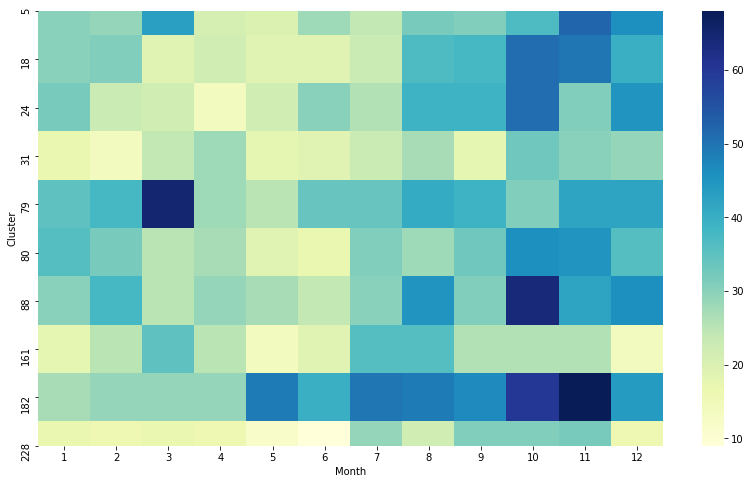

In [53]:
fig, ax = plt.subplots(figsize=(14,8))         # Sample figsize in inches

sns.heatmap(ClusterMonthMap, cmap="YlGnBu", ax = ax)

We see that for cluster 79, there are far greater accidents in March compared to rest of year. Similarly for clusters 88 and 182, high accident rates are noticed in october and november. This seasonal information and its impact on accidents can be used to prevent these under known circumstances.

In [7]:
#For a general user guideline we can place the hotspots on the map and people can be aware of those.
hotspotClusterData.groupby('Cluster').agg(np.mean)[['Start_Lat','Start_Lng']]

,Start_Lat,Start_Lng
Cluster,,
5,25.812273,-80.205886
18,26.033455,-80.164418
24,26.011045,-80.166899
31,25.784110,-80.288627
79,25.869296,-80.208375
80,25.861979,-80.208222
88,25.789071,-80.204354
161,28.535368,-81.383295
182,25.964129,-80.165771


With the addition of google maps integration we can help the customers by identifying the hotspots near them and cautioning them about those. Also, we can help the customers make a safer journey plan by asking them to avoid potential hotspots in adverse weather conditions. 

A third feature can be to ask user for origin and destination and the app would tell the best time for him/her to travel so that they can enjoy a safe peaceful journey. This will take into account both bad weather conditions and accident hotspots.